In [21]:
!pip3 install -U ucimlrepo 

# **1. Exploratory Data Analysis (EDA)**

**1. Import Dependencies**

In [77]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

import pickle
from sklearn.ensemble import RandomForestClassifier
import joblib


**2. Load the Dataset**

In [70]:

# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 


In [71]:
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

In [85]:
X.tail()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1
253679,1,1,1,25,0,0,1,1,1,0,...,1,0,2,0,0,0,0,9,6,2


In [84]:
y.tail()

,Diabetes_binary
253675,0
253676,1
253677,0
253678,0
253679,1


**3. Get the Statistical Details**

In [74]:
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# **2. Split Dataset into training and testing dataset**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Model Selection**

## **Model 1: KNN**

c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 1, Train/Test Score: 0.993/0.803


c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 3, Train/Test Score: 0.902/0.835


c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 5, Train/Test Score: 0.886/0.846


c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 7, Train/Test Score: 0.879/0.851


c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 9, Train/Test Score: 0.876/0.853


c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 11, Train/Test Score: 0.874/0.856


c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 13, Train/Test Score: 0.872/0.857


c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 15, Train/Test Score: 0.871/0.858


c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 17, Train/Test Score: 0.870/0.858


c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 19, Train/Test Score: 0.869/0.859


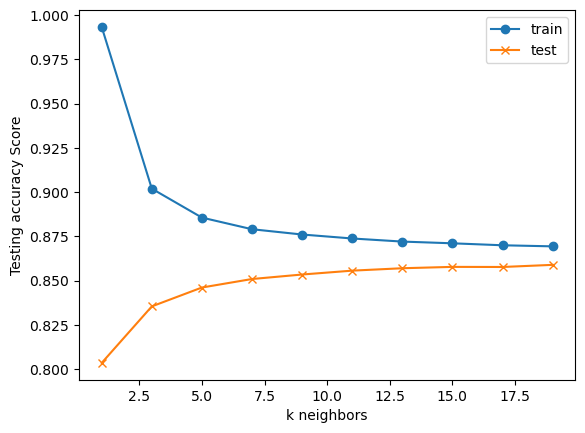

In [35]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend(["train", "test"])

Train Model

In [76]:
# Train the KNN model with the best k value
# Note that k: 9 seems to be the best choice for this dataset

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % model_knn.score(X_test, y_test))

c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=9 Test Acc: 0.846


Evaluate Model

In [42]:
y_knn = knn.predict(X_test)

Calcualte the Precision, Recall And Accuracy Score for our model

In [43]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     43525
           1       0.41      0.19      0.26      7211

    accuracy                           0.85     50736
   macro avg       0.64      0.57      0.59     50736
weighted avg       0.81      0.85      0.82     50736



In [44]:
balanced_accuracy_RFC = metrics.balanced_accuracy_score(y_test, y_knn)
print('Balanced Accuracy:', balanced_accuracy_RFC)

Balanced Accuracy: 0.5737515081424759


In [45]:
roc_auc_RFC = metrics.roc_auc_score(y_test, y_knn)
print('ROC AUC:', roc_auc_RFC)

ROC AUC: 0.5737515081424759


## **Model 2: Decision Tree Model**

In [ ]:
model_DT = tree.DecisionTreeClassifier()

Train Model

In [ ]:
model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

Evaluate Model

In [ ]:
y_DT = model_RFC.predict(X_test)

In [ ]:
print(classification_report(y_test,y_DT))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43525
           1       0.51      0.17      0.26      7211

    accuracy                           0.86     50736
   macro avg       0.69      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736



In [ ]:
balanced_accuracy_DT = metrics.balanced_accuracy_score(y_test, y_DT)
print('Balanced Accuracy:', balanced_accuracy_DT)

Balanced Accuracy: 0.5730385346084397


In [ ]:
roc_auc_DT = metrics.roc_auc_score(y_test, y_DT)
print('ROC AUC:', roc_auc_DT)

ROC AUC: 0.5730385346084397


## **Model 3: Random Forest Classifier**

In [29]:
model_RFC = RandomForestClassifier()

Train Model

In [30]:
model_RFC.fit(X_train,y_train)

c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

Evaluate Model

In [31]:
y_RFC = model_RFC.predict(X_test)

Calcualte the Precision, Recall And Accuracy Score for our model

In [32]:
print(classification_report(y_test,y_RFC))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43525
           1       0.51      0.17      0.26      7211

    accuracy                           0.86     50736
   macro avg       0.69      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736



In [33]:
balanced_accuracy_RFC = metrics.balanced_accuracy_score(y_test, y_RFC)
print('Balanced Accuracy:', balanced_accuracy_RFC)

Balanced Accuracy: 0.5730385346084397


In [34]:
roc_auc_RFC = metrics.roc_auc_score(y_test, y_RFC)
print('ROC AUC:', roc_auc_RFC)

ROC AUC: 0.5730385346084397


## **Model 4: Extremely Random Trees classifier**

In [63]:
model_ERT = ExtraTreesClassifier(random_state=1)

Train Model

In [64]:
model_ERT.fit(X_train, y_train)

c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesClassifier(random_state=1)

Evaluate Model

In [65]:
y_ERT = model_ERT.predict(X_test)

In [66]:
print(classification_report(y_test,y_ERT))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     43525
           1       0.44      0.17      0.25      7211

    accuracy                           0.85     50736
   macro avg       0.66      0.57      0.58     50736
weighted avg       0.81      0.85      0.82     50736



In [67]:
balanced_accuracy_ERT = metrics.balanced_accuracy_score(y_test, y_ERT)
print('Balanced Accuracy:', balanced_accuracy_ERT)

Balanced Accuracy: 0.5682009958141205


In [68]:
roc_auc_ERT = metrics.roc_auc_score(y_test, y_ERT)
print('ROC AUC:', roc_auc_ERT)

ROC AUC: 0.5682009958141206


## **Model 5: Neural Network --> MLPClassifier**

In [37]:
model_MLPC = MLPClassifier()

Train Model

In [38]:
model_MLPC.fit(X_train,y_train)

c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier()

Make the prediction

In [39]:
y_MLPC = model_MLPC.predict(X_test)

**Evaluate the model**

In [40]:
print(classification_report(y_test,y_MLPC))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     43525
           1       0.64      0.11      0.19      7211

    accuracy                           0.86     50736
   macro avg       0.75      0.55      0.56     50736
weighted avg       0.84      0.86      0.82     50736



# **3. Test the model Manuallly**

In [86]:
# Testing the Model

HighBP = 1
HighChol = 1
CholCheck = 1
BMI = 25
Smoker = 0
Stroke = 0
HeartDiseaseorAttack = 1
PhysActivity = 1
Fruits = 1
Veggies = 0
HvyAlcoholConsump = 0
AnyHealthcare = 1
NoDocbcCost = 0
GenHlth = 2
MentHlth = 0
PhysHlth = 0
DiffWalk = 0
Sex = 0
Age = 9
Education = 6
Income = 2

manual_pred_knn = model_knn.predict([[HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]])
manual_pred_DT = model_DT.predict([[HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]])
manual_pred_RFC = model_RFC.predict([[HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]])
manual_pred_ERT = model_ERT.predict([[HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]])
manual_pred_MLPC = model_MLPC.predict([[HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]])

print('KNN Prediction:', manual_pred_knn)
print('DT Prediction:', manual_pred_DT)
print('RFC Prediction:', manual_pred_RFC)
print('ERT Prediction:', manual_pred_ERT)
print('MLPC Prediction:', manual_pred_MLPC)

KNN Prediction: [0]
DT Prediction: [1]
RFC Prediction: [1]
ERT Prediction: [1]
MLPC Prediction: [0]


c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


# **4. Save Model**

#### **4.1 KNN Model**

In [ ]:
joblib.dump(model_knn, 'model_knn.joblib')

#### **4.2 Decision Tree Model**

In [ ]:
joblib.dump(model_DT, 'model_DT.joblib')

#### **4.3 Random Forest Tree Model**

In [ ]:
joblib.dump(model_RFC, 'model_RFC.joblib')

#### **4.4 Extremely Random Forest Tree Model**

In [ ]:
joblib.dump(model_ERT, 'model_ERT.joblib')

#### **4.5 Neural Networks Model**

In [ ]:
joblib.dump(model_MLPC, 'model_MLPC.joblib')

# **5. Load the Model**

#### **5.1 KNN Model**

In [ ]:
pickle.dump(model_knn, open('model_knn.sav','wb'))
load_knn = pickle.load(open('model_knn.sav','rb'))

#### **5.2 Decision Tree Model**

In [ ]:
pickle.dump(model_DT, open('model_DT.sav','wb'))
load_DT = pickle.load(open('model_DT.sav','rb'))

#### **5.3 Random Forest Tree Model**

In [ ]:
pickle.dump(model_RFC, open('model_RFC.sav','wb'))
load_RFC = pickle.load(open('model_RFC.sav','rb'))

#### **5.4 Extremely Random Forest Tree Model**

In [ ]:
pickle.dump(model_ERT, open('model_ERT.sav','wb'))
load_ERT = pickle.load(open('model_ERT.sav','rb'))

#### **5.5 Neural Networks Model**

In [ ]:
pickle.dump(model_MLPC, open('model_MLPC.sav','wb'))
load_MLPC = pickle.load(open('model_MLPC.sav','rb'))

# **6. Test the Models**

In [92]:
HighBP = 1
HighChol = 1
CholCheck = 1
BMI = 25
Smoker = 0
Stroke = 0
HeartDiseaseorAttack = 1
PhysActivity = 1
Fruits = 1
Veggies = 0
HvyAlcoholConsump = 0
AnyHealthcare = 1
NoDocbcCost = 0
GenHlth = 2
MentHlth = 0
PhysHlth = 0
DiffWalk = 0
Sex = 0
Age = 9
Education = 6
Income = 2

In [ ]:
manual_pred_knn = model_knn.predict([[HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]])
manual_pred_DT = model_DT.predict([[HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]])
manual_pred_RFC = model_RFC.predict([[HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]])
manual_pred_ERT = model_ERT.predict([[HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]])
manual_pred_MLPC = model_MLPC.predict([[HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income]])    
                                      
print('KNN Prediction:', manual_pred_knn)
print('DT Prediction:', manual_pred_DT)
print('RFC Prediction:', manual_pred_RFC)
print('ERT Prediction:', manual_pred_ERT)
print('MLPC Prediction:', manual_pred_MLPC)



KNN Prediction: [0]


c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
